In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
def gaussian_Q_half_kernel(
    landmarks: jnp.ndarray, alpha: float, sigma: float
) -> jnp.ndarray:
    xy_coords = landmarks.reshape(-1, 2)
    num_landmarks = xy_coords.shape[0]
    diff = xy_coords[:, jnp.newaxis, :] - xy_coords[jnp.newaxis, :, :]
    dis = jnp.sum(jnp.square(diff), axis=-1)
    kernel = alpha * jnp.exp(-0.5 * dis / (sigma**2)) 
    Q_half = jnp.einsum("ij,kl->ikjl", kernel, jnp.eye(2))
    Q_half = Q_half.reshape(2 * num_landmarks, 2 * num_landmarks)
    return Q_half


def gaussian_Q_kernel(
    landmarks: jnp.ndarray, alpha: float, sigma: float
) -> jnp.ndarray:
    xy_coords = landmarks.reshape(-1, 2)
    num_landmarks = xy_coords.shape[0]
    diff = xy_coords[:, jnp.newaxis, :] - xy_coords[jnp.newaxis, :, :]
    dis = jnp.sum(jnp.square(diff), axis=-1)
    kernel = (
        (alpha**2)  * (2.0 * jnp.pi) * jnp.exp(-0.25 * dis / (sigma**2))
    )
    Q = jnp.einsum("ij,kl->ikjl", kernel, jnp.eye(2))
    Q = Q.reshape(2 * num_landmarks, 2 * num_landmarks)
    return Q

In [3]:
n_pts = 64
ts = jnp.linspace(0.0, 2.0*jnp.pi, n_pts, endpoint=False)
landmarks = jnp.stack([jnp.cos(ts), jnp.sin(ts)], axis=-1).flatten()
print(landmarks.shape)

2024-04-23 16:01:18.124071: W external/xla/xla/service/gpu/nvptx_compiler.cc:744] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


(128,)


In [7]:
Q_half = gaussian_Q_half_kernel(landmarks, alpha=1.0, sigma=0.2)
Q = gaussian_Q_kernel(landmarks, alpha=1.0, sigma=0.2)

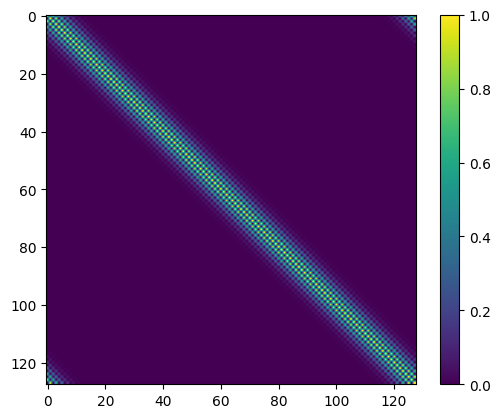

In [8]:
plt.imshow(Q_half)
plt.colorbar()

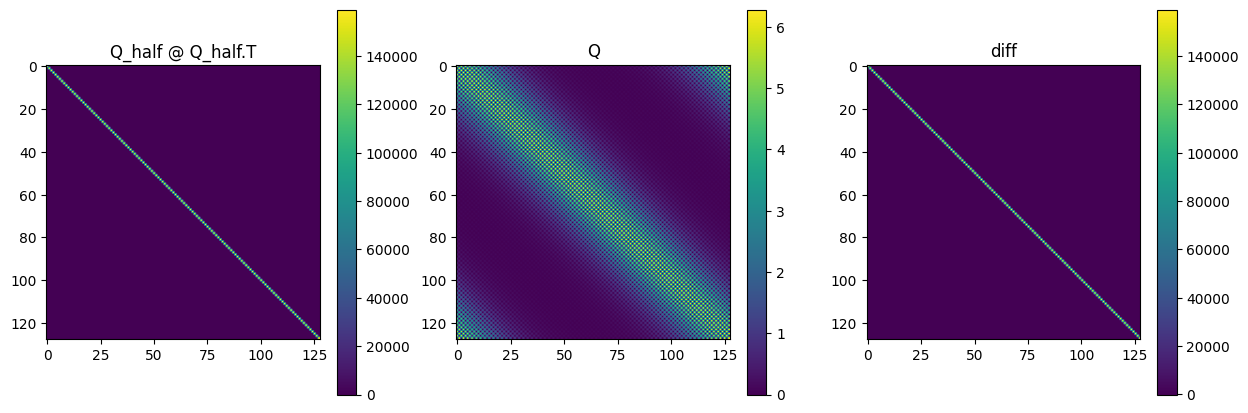

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
im1 = ax[0].imshow(Q_half @ Q_half.T)
ax[0].set_title("Q_half @ Q_half.T")
fig.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(Q)
ax[1].set_title("Q")
fig.colorbar(im2, ax=ax[1])
im3 = ax[2].imshow(Q_half @ Q_half.T - Q)
ax[2].set_title("diff")
fig.colorbar(im3, ax=ax[2])